# Import Dataset

In [ ]:
import pandas as pd

# read the dataset
dt = 'https://raw.githubusercontent.com/mhmdrazn/regression-bushfires/main/Bushfires%20Dataset'
dataset = pd.read_csv(dt, delimiter= ",", encoding = "utf-8")

dataset.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Suburb,Time,Status,Location,Area,Minimum temperature (°C),Maximum temperature (°C),Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed of maximum wind gust (km/h),Time of maximum wind gust
0,2024-01-05 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,"16,80","30,20",0.00,NaN,NaN,SSW,46.00,15:15
1,2024-01-06 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,"18,00","31,70",0.00,NaN,NaN,SSW,44.00,15:16
2,2024-01-07 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,"18,80","35,20",0.00,NaN,NaN,SSW,41.00,14:53
3,2024-01-08 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,"21,90","34,20",0.00,NaN,NaN,SSW,50.00,14:46
4,2024-01-09 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,"17,80","25,10",0.00,NaN,NaN,SSW,54.00,17:02


# Data Preprocessing



## 1. Convert Temperature and Wind Speed to numerical values

In [ ]:
# Convert temperature and wind speed columns to numerical values
dataset['Minimum temperature (°C)'] = dataset['Minimum temperature (°C)'].str.replace(',', '.').astype(float)
dataset['Maximum temperature (°C)'] = dataset['Maximum temperature (°C)'].str.replace(',', '.').astype(float)
dataset['Speed of maximum wind gust (km/h)'] = dataset['Speed of maximum wind gust (km/h)'].str.replace(',', '.').astype(float)

dataset.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Suburb,Time,Status,Location,Area,Minimum temperature (°C),Maximum temperature (°C),Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed of maximum wind gust (km/h),Time of maximum wind gust
0,2024-01-05 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,16.8,30.2,0.00,NaN,NaN,SSW,46.0,15:15
1,2024-01-06 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,18.0,31.7,0.00,NaN,NaN,SSW,44.0,15:16
2,2024-01-07 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,18.8,35.2,0.00,NaN,NaN,SSW,41.0,14:53
3,2024-01-08 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,21.9,34.2,0.00,NaN,NaN,SSW,50.0,14:46
4,2024-01-09 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,17.8,25.1,0.00,NaN,NaN,SSW,54.0,17:02


## 2. Encode categorical variables "Direction" using one-hot encoding or label encoding


In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode 'Direction' columns
label_encoder_direction = LabelEncoder()
dataset['Direction'] = label_encoder_direction.fit_transform(dataset['Direction Max Wind Gust'])

# Display the first few rows to check the encoding
dataset[['Status', 'Direction']].head()

# SAFE : 1
# ADVICE : 2
# WATCH AND ACT : 3
# BURNT : 4
# EMERGENCY WARNING : 5

dataset.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Suburb,Time,Status,Location,Area,Minimum temperature (°C),Maximum temperature (°C),Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,Direction
0,2024-01-05 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,16.8,30.2,0.00,NaN,NaN,SSW,46.0,15:15,9
1,2024-01-06 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,18.0,31.7,0.00,NaN,NaN,SSW,44.0,15:16,9
2,2024-01-07 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,18.8,35.2,0.00,NaN,NaN,SSW,41.0,14:53,9
3,2024-01-08 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,21.9,34.2,0.00,NaN,NaN,SSW,50.0,14:46,9
4,2024-01-09 12:30:00+00:00,Attadale,NaN,1,NaN,NaN,17.8,25.1,0.00,NaN,NaN,SSW,54.0,17:02,9


## 3. Handle missing values

In [ ]:
# Handle missing values (e.g., fill with mean or median, or drop rows)
dataset = dataset.dropna()

# Display the first few rows to ensure no missing values
dataset.head()

,Date,Suburb,Time,Status,Location,Area,Minimum temperature (°C),Maximum temperature (°C),Rainfall,Evaporation,Sunshine,Direction Max Wind Gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,Direction
272,2024-02-09 00:51:59+00:00,Ascot,8:51:00,2,ASCOT. PERTH AIRPORT. REDCLIFFE and SOUTH GUIL...,TOWN of BASSENDEAN and CITIES of BELMONT and SWAN,19.9,42.0,0.00,14.2,12.5,SW,33.0,15:34,10
273,2024-02-09 02:32:18+00:00,Ascot,10:32:00,2,ASCOT. PERTH AIRPORT. REDCLIFFE and SOUTH GUIL...,TOWN of BASSENDEAN and CITIES of BELMONT and SWAN,19.9,42.0,0.00,14.2,12.5,SW,33.0,15:34,10
274,2024-02-09 03:55:32+00:00,Ascot,11:55:00,2,ASCOT. PERTH AIRPORT. REDCLIFFE and SOUTH GUIL...,TOWN of BASSENDEAN and CITIES of BELMONT and SWAN,19.9,42.0,0.00,14.2,12.5,SW,33.0,15:34,10
275,2023-12-22 20:07:21+00:00,Bailup,4:07:00,2,BAILUP. GIDGEGANNUP and WOOROLOO,CITY OF SWAN and the SHIRE OF MUNDARING,18.5,32.8,0.00,12.6,12.6,W,30.0,11:31,11
276,2023-12-29 02:30:51+00:00,Bailup,10:30:00,2,BAILUP. GIDGEGANNUP and WOOROLOO,CITY OF SWAN and the SHIRE OF MUNDARING,17.7,33.0,0.00,10.2,11.0,ESE,56.0,2:49,2


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 272 to 1255
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               372 non-null    object 
 1   Suburb                             372 non-null    object 
 2   Time                               372 non-null    object 
 3   Status                             372 non-null    int64  
 4   Location                           372 non-null    object 
 5   Area                               372 non-null    object 
 6   Minimum temperature (°C)           372 non-null    float64
 7   Maximum temperature (°C)           372 non-null    float64
 8   Rainfall                           372 non-null    object 
 9   Evaporation                        372 non-null    float64
 10  Sunshine                           372 non-null    float64
 11  Direction Max Wind Gust            372 non-null    object 
 

# Checking Outliers

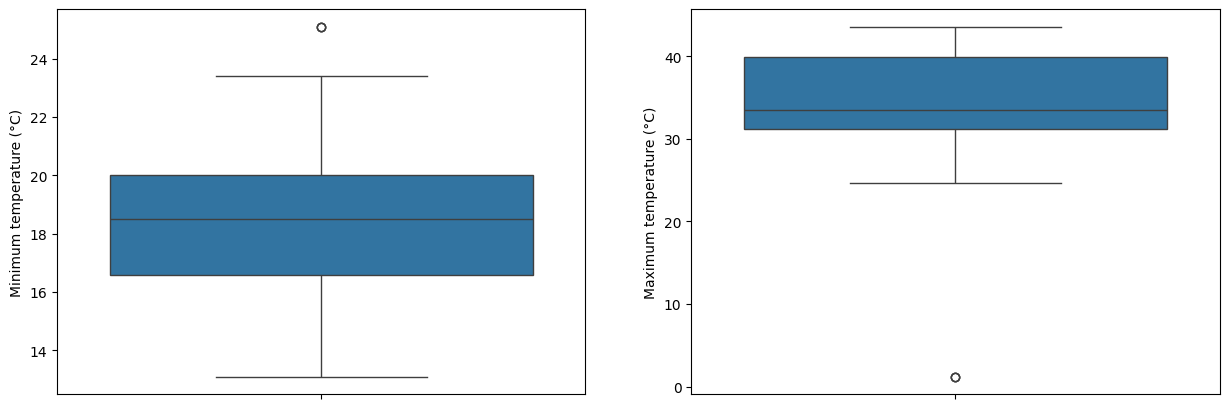

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# checking outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Minimum temperature (°C)")

plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="Maximum temperature (°C)")

plt.show()

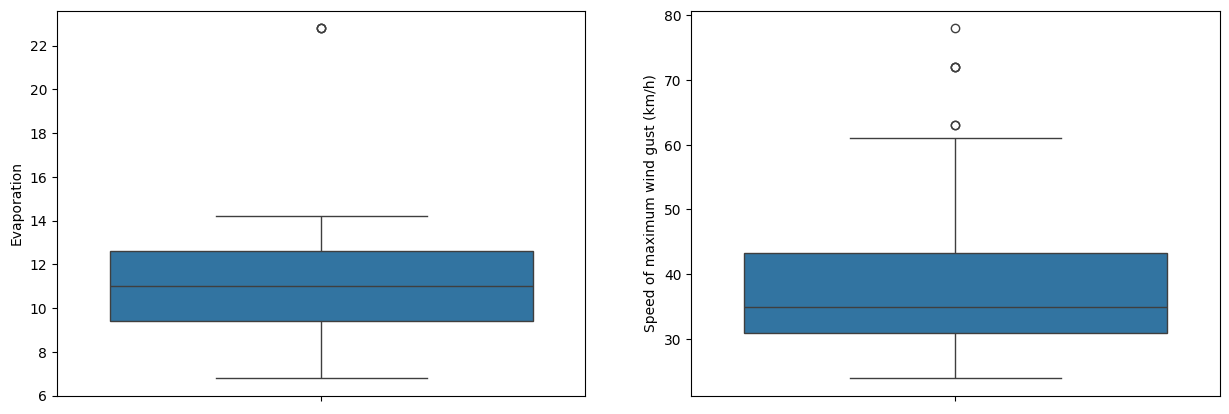

In [ ]:
# checking outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Evaporation")

plt.subplot(1,2,2)
sns.boxplot(data=dataset, y="Speed of maximum wind gust (km/h)")

plt.show()

# Removing Outliers

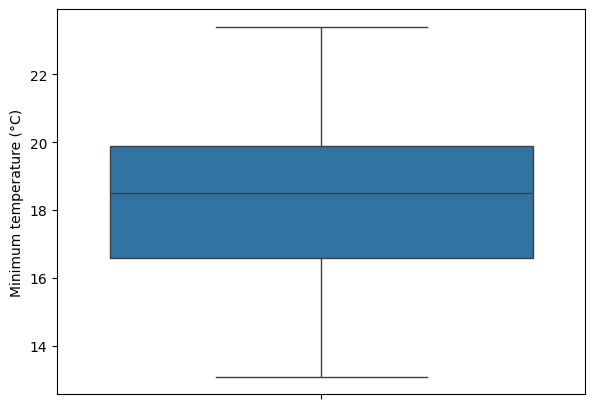

In [ ]:
# Calculates Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Minimum temperature (°C)'].quantile(0.25)
Q3 = dataset['Minimum temperature (°C)'].quantile(0.75)
IQR = Q3 - Q1
# Determine the upper and lower limits for detecting outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Removing outliers
dataset = dataset[(dataset['Minimum temperature (°C)'] >= lower_bound) & (dataset['Minimum temperature (°C)'] <= upper_bound)]

# Checking outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Minimum temperature (°C)")
plt.show()

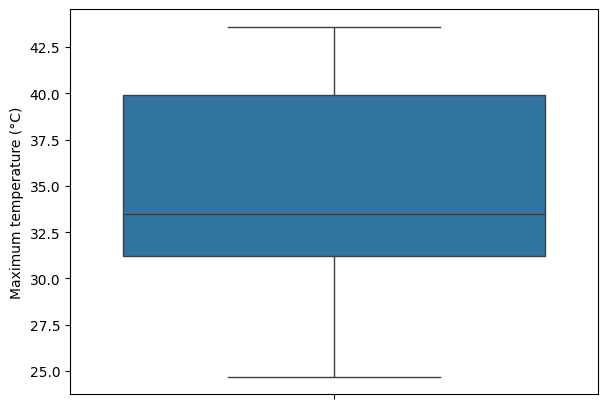

In [ ]:
# Calculates Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Maximum temperature (°C)'].quantile(0.25)
Q3 = dataset['Maximum temperature (°C)'].quantile(0.75)
IQR = Q3 - Q1
# Determine the upper and lower limits for detecting outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Removing outliers
dataset = dataset[(dataset['Maximum temperature (°C)'] >= lower_bound) & (dataset['Maximum temperature (°C)'] <= upper_bound)]

# Checking outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Maximum temperature (°C)")
plt.show()

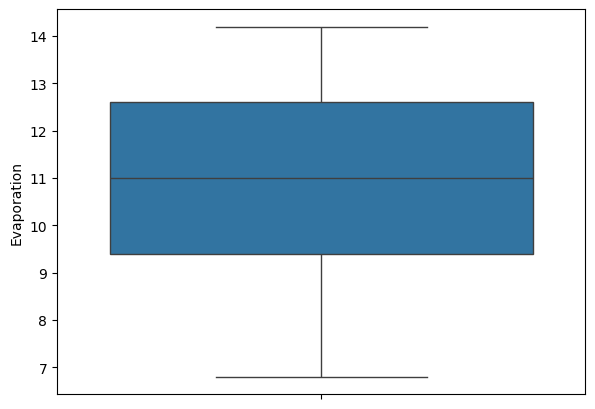

In [ ]:
# Calculates Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Evaporation'].quantile(0.25)
Q3 = dataset['Evaporation'].quantile(0.75)
IQR = Q3 - Q1
# Determine the upper and lower limits for detecting outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Removing outliers
dataset = dataset[(dataset['Evaporation'] >= lower_bound) & (dataset['Evaporation'] <= upper_bound)]

# Checking outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Evaporation")
plt.show()

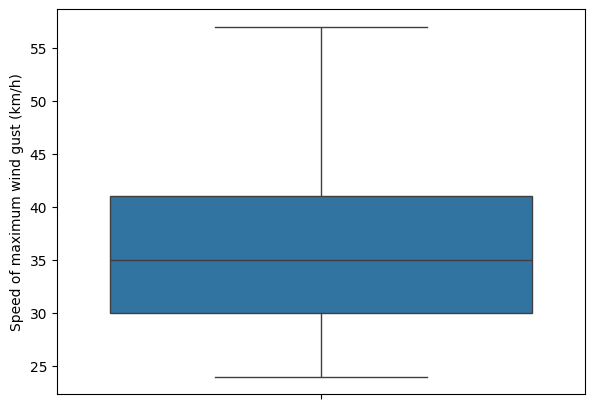

In [ ]:
# Calculates Q1 (25th percentile) and Q3 (75th percentile)
Q1 = dataset['Speed of maximum wind gust (km/h)'].quantile(0.25)
Q3 = dataset['Speed of maximum wind gust (km/h)'].quantile(0.75)
IQR = Q3 - Q1
# Determine the upper and lower limits for detecting outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Removing outliers
dataset = dataset[(dataset['Speed of maximum wind gust (km/h)'] >= lower_bound) & (dataset['Speed of maximum wind gust (km/h)'] <= upper_bound)]

# Checking outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=dataset, y="Speed of maximum wind gust (km/h)")
plt.show()

# Define and Train Model


## Split the Data into training and testing sets

In [ ]:
  from sklearn.model_selection import train_test_split

# Select the feature columns and the target column
features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Evaporation', 'Speed of maximum wind gust (km/h)']
target = 'Status'

# Split the data into training and testing sets
X = dataset[features]     #dependent
y = dataset[target]       #independent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head(), y_train.head()
print(X_train)
print(y_train)

      Minimum temperature (°C)  Maximum temperature (°C)  Evaporation  \
975                       23.2                      40.7         11.0   
698                       18.6                      35.3          7.6   
667                       14.9                      28.9         10.0   
298                       16.7                      31.2         13.0   
814                       15.4                      41.1         11.8   
...                        ...                       ...          ...   
405                       17.8                      36.3         10.4   
569                       20.0                      31.8         12.6   
979                       18.3                      26.2          6.8   
1251                      18.5                      32.8         12.6   
558                       18.8                      43.4         14.2   

      Speed of maximum wind gust (km/h)  
975                                33.0  
698                                33.0

##Train the model

In [ ]:
import numpy as np
from math import pi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

# Model Training
# Fit a logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make a prediction

In [ ]:
import numpy as np
from math import pi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[2.47918516 2.60587075 2.84113937 2.66468729 2.65077028 2.43985725
 3.18849632 2.65077028 3.18849632 3.0838756  2.5175003  2.98306884
 2.48239099 2.84696211 3.18849632 2.77935133 2.03029776 3.24708502
 2.56868296 2.88019035 2.42054462 3.18849632 2.37786994 2.82449575
 2.5175003  2.69136312 2.83567058 2.98306884 3.24708502 2.07580122
 2.61053449 2.66468729 3.24708502 3.18849632 1.82215337 2.50226165
 2.6933183  2.43985725 2.77935133 2.5175003  2.35234281 2.28060658
 2.83567058 2.8779829  2.83567058 3.24708502 2.4743701  2.40688698
 2.83567058 2.42054462 2.88019035 2.50226165 2.87653965 2.03029776
 3.24708502 2.45751062 3.24708502 2.45450507 2.48442993 3.0838756
 3.11920922 2.42054462 2.47918516 2.03029776 2.07580122 2.69136312
 2.50226165 2.66468729 2.71646059 3.24708502 2.42054462 2.83567058
 3.24708502 3.24708502 2.21451287 2.42054462 3.24708502 3.18849632
 2.60122066 2.6933183  2.28060658 1.82215337 2.54875644 2.84696211
 2.48239099 2.84696211 3.24708502 3.24708502 1.94369097 2.60249

# Evaluate the model


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.9145205331491431


# Visualize the Model

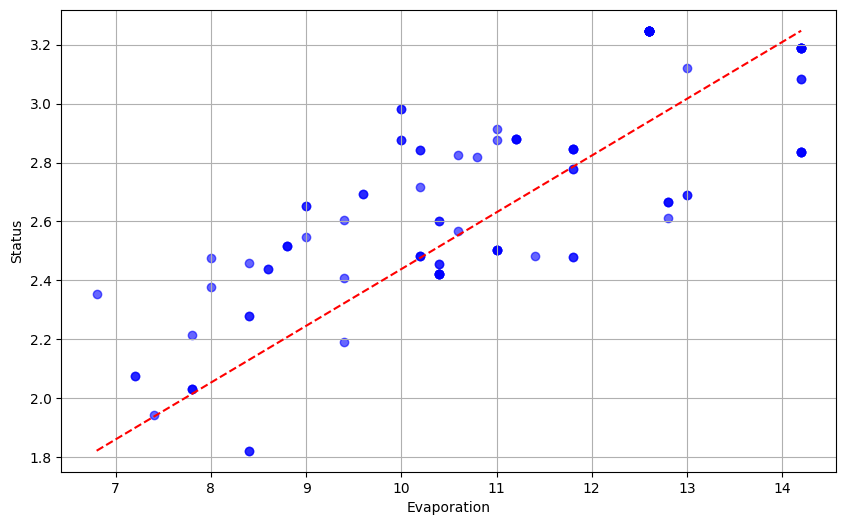

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

plt.scatter(X_test['Evaporation'], y_pred, alpha=0.6, color='b')

plt.plot([min(X_test['Evaporation']), max(X_test['Evaporation'])], [min(y_pred), max(y_pred)], color='r', linestyle='--')
plt.xlabel('Evaporation')
plt.ylabel('Status')
plt.grid(True)
plt.show()

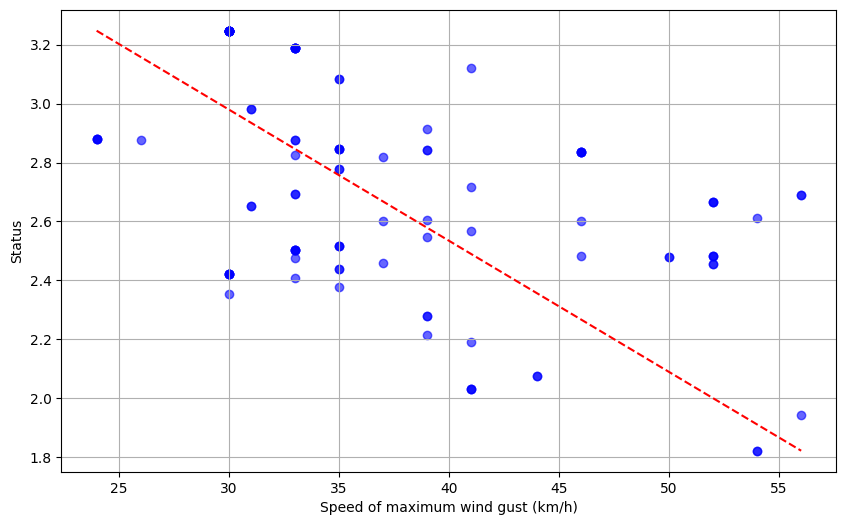

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

plt.scatter(X_test['Speed of maximum wind gust (km/h)'], y_pred, alpha=0.6, color='b')

plt.plot([min(X_test['Speed of maximum wind gust (km/h)']), max(X_test['Speed of maximum wind gust (km/h)'])], [max(y_pred), min(y_pred)], color='r', linestyle='--')
plt.xlabel('Speed of maximum wind gust (km/h)')
plt.ylabel('Status')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_true are the actual values and y_pred are the predicted values
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.1846243867092885


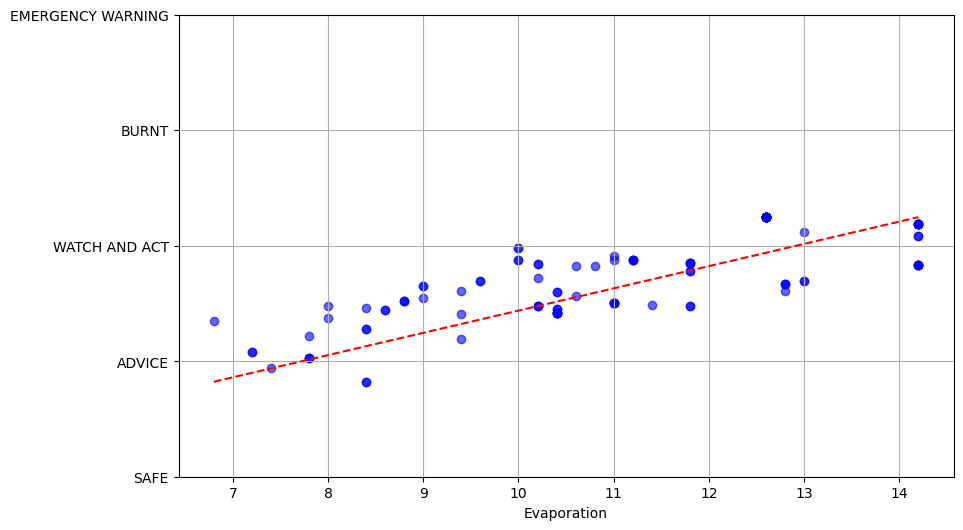

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure
plt.figure(figsize=(10, 6))

# Membuat scatter plot
plt.scatter(X_test['Evaporation'], y_pred, alpha=0.6, color='b')

# Menambahkan garis referensi
plt.plot([min(X_test['Evaporation']), max(X_test['Evaporation'])], [min(y_pred), max(y_pred)], color='r', linestyle='--')

# Mengatur label sumbu x dan y
plt.xlabel('Evaporation')



# Mengatur nilai diskret dan label untuk sumbu y
plt.yticks([1, 2, 3, 4, 5], ['SAFE', 'ADVICE', 'WATCH AND ACT', 'BURNT', 'EMERGENCY WARNING'])

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()


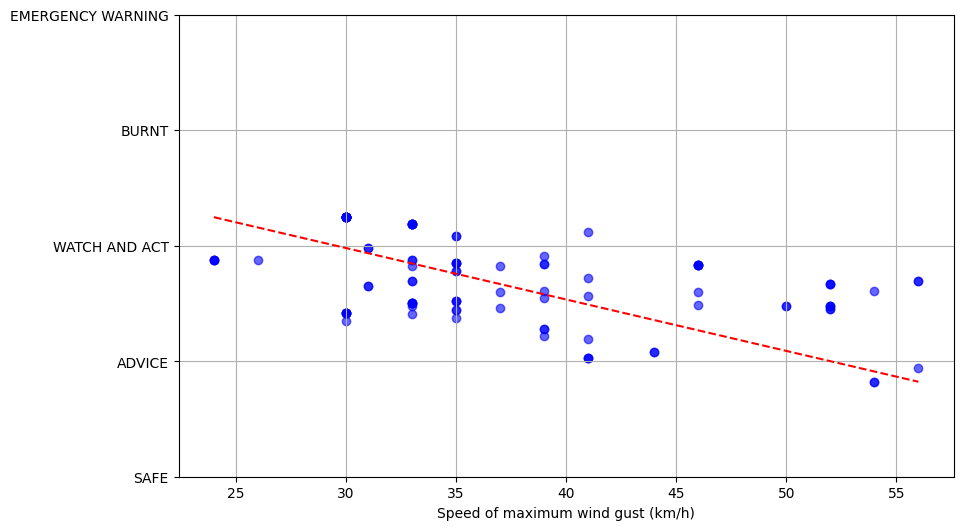

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

plt.scatter(X_test['Speed of maximum wind gust (km/h)'], y_pred, alpha=0.6, color='b')

plt.plot([min(X_test['Speed of maximum wind gust (km/h)']), max(X_test['Speed of maximum wind gust (km/h)'])], [max(y_pred), min(y_pred)], color='r', linestyle='--')
plt.xlabel('Speed of maximum wind gust (km/h)')

# Mengatur nilai diskret dan label untuk sumbu y
plt.yticks([1, 2, 3, 4, 5], ['SAFE', 'ADVICE', 'WATCH AND ACT', 'BURNT', 'EMERGENCY WARNING'])

plt.grid(True)
plt.show()